<a href="https://colab.research.google.com/github/Shukla070/Utkarsh_231AI040_ML/blob/main/180DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sec-edgar-downloader



In [ ]:
from sec_edgar_downloader import Downloader


email_address = "utkarshshukla070@gmail.com"


dl = Downloader("AAPL", email_address)


dl.get("10-K", "AAPL")



28

In [ ]:
import os


path = './SEC-Edgar-Data/AAPL/10-K/'


os.makedirs(path, exist_ok=True)

In [ ]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


filings_dir = "./SEC-Edgar-Data/AAPL/10-K/"


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\n+', '\n', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def extract_sections(filing_text):
    sections = {}
    sections['Item 1'] = re.search(r'Item 1\.\s+(.*?)Item 1A\.', filing_text, re.DOTALL)
    sections['Item 7'] = re.search(r'Item 7\.\s+(.*?)Item 8\.', filing_text, re.DOTALL)

    for key in sections:
        if sections[key]:
            sections[key] = clean_text(sections[key].group(1))
        else:
            sections[key] = "Section not found"

    return sections


all_sections = []
for filename in os.listdir(filings_dir):
    if filename.endswith(".txt"):
        with open(os.path.join(filings_dir, filename), 'r') as file:
            filing_text = file.read()
            sections = extract_sections(filing_text)

            preprocessed_sections = {key: preprocess_text(value) for key, value in sections.items()}
            all_sections.append(preprocessed_sections)
            print(f"Processed {filename}:")
            print(f"Item 1: {preprocessed_sections['Item 1'][:200]}...")  # Print a snippet of Item 1
            print(f"Item 7: {preprocessed_sections['Item 7'][:200]}...")  # Print a snippet of Item 7


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
import openai


openai.api_key = 'OPENAI_KEY'

def analyze_text_with_gpt(text, section_name):
    prompt = f"Analyze the {section_name} section of a company's 10-K report. Identify key themes, sentiments, and any significant changes or trends over time. Here is the text: {text}"

    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt,
        max_tokens=500
    )

    return response.choices[0].text.strip()


insights = []
for i, filing_sections in enumerate(all_sections):
    print(f"Analyzing Filing {i+1}:")
    for section_name, section_text in filing_sections.items():
        if section_text != "Section not found":
            analysis = analyze_text_with_gpt(section_text, section_name)
            print(f"Analysis for {section_name}: {analysis}")
            insights.append((section_name, analysis))
        else:
            print(f"{section_name}: Section not found")


In [ ]:
!pip install matplotlib seaborn pandas


In [ ]:

# print(f"Length of years list: {len(years)}")
# print(f"Length of sentiments list: {len(sentiments)}")


# print(f"Years: {years}")
# print(f"Sentiments: {sentiments}")


Length of years list: 5
Length of sentiments list: 0
Years: ['2019', '2020', '2021', '2022', '2023']
Sentiments: []


In [ ]:
print("Sentiment values for each year:")
print(sentiments)

Sentiment values for each year:
[None, None, None, None, None]


In [ ]:

sample_text = "The company's performance was outstanding this year, with significant growth in revenue."
sample_sentiment = get_sentiment(sample_text)
print(f"Sentiment of sample text: {sample_sentiment}")

Sentiment of sample text: 0.4375


In [ ]:

print("Item 7 analysis texts:")
for text in item_7_analyses:
    print(text[:500])

Item 7 analysis texts:


In [ ]:

# if len(sentiments) < len(years):
#     sentiments.extend([None] * (len(years) - len(sentiments)))
# elif len(sentiments) > len(years):
#     years.extend(['Unknown'] * (len(sentiments) - len(years)))


Length of years list: 5
Length of sentiments list: 5


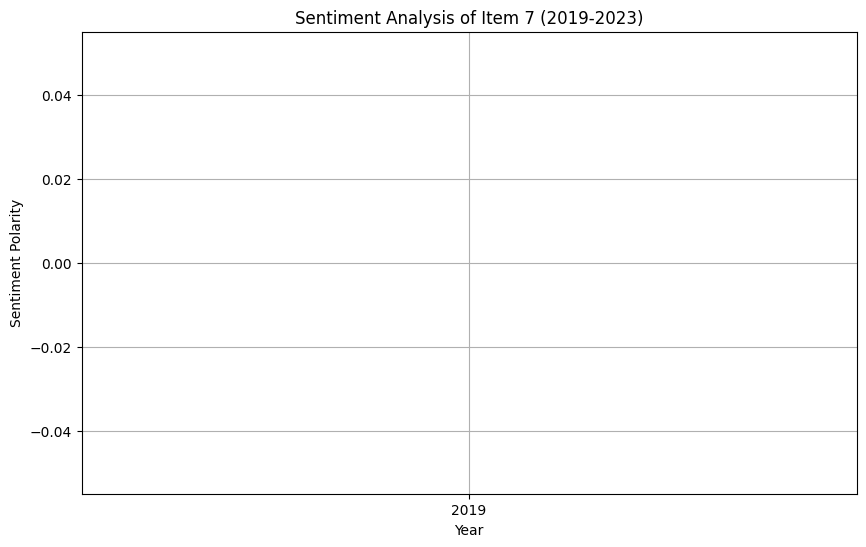

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textblob import TextBlob


item_7_analyses = [text for section, text in insights if section == "Item 7"]


def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


sentiments = [get_sentiment(text) for text in item_7_analyses]


if len(sentiments) < len(years):
    sentiments.extend([None] * (len(years) - len(sentiments)))


print(f"Length of years list: {len(years)}")
print(f"Length of sentiments list: {len(sentiments)}")


df = pd.DataFrame({'Year': years, 'Sentiment': sentiments})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sentiment', data=df, marker='o')
plt.title("Sentiment Analysis of Item 7 (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Sentiment Polarity")
plt.grid(True)
plt.show()


In [ ]:
from textblob import TextBlob


def get_sentiment(text):
    if text.strip():
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return None


sentiments = [get_sentiment(text) for text in item_7_analyses]


print("Sentiment values for each year:")
print(sentiments)


sentiments = [s if s is not None else 0 for s in sentiments]


df = pd.DataFrame({'Year': years, 'Sentiment': sentiments})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sentiment', data=df, marker='o')
plt.title("Sentiment Analysis of Item 7 (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Sentiment Polarity")
plt.grid(True)
plt.show()


Sentiment values for each year:
[]


ValueError: All arrays must be of the same length